In [28]:
import numpy as np
import pandas as pd

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
from scipy.stats import pearsonr

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
spotify_data = pd.read_csv("/content/Spotify_data.csv")

In [61]:
numerical_features = spotify_data.select_dtypes(include=[np.number]).columns.tolist()
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

In [33]:
print('Shape of the dataframe: ',spotify_data.shape)

Shape of the dataframe:  (227, 22)


In [34]:
spotify_data.head(1)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.0,0.141,0.214,101.061


In [35]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

In [36]:
spotify_data.describe()

,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,113.000000,71.85022,219254.881057,0.635639,0.646665,5.458150,-6.516670,0.678414,0.079576,0.375060,0.028890,0.177797,0.472441,119.466361
std,65.673435,10.24110,60483.492317,0.155123,0.159150,3.760738,2.099543,0.468117,0.085100,0.300084,0.137225,0.121366,0.193902,26.154889
min,0.000000,13.00000,96947.000000,0.271000,0.236000,0.000000,-15.073000,0.000000,0.024600,0.000307,0.000000,0.029700,0.038500,61.311000
25%,56.500000,68.00000,170554.500000,0.552000,0.539500,2.000000,-7.830000,0.000000,0.033800,0.065000,0.000000,0.101000,0.324500,95.457500
50%,113.000000,72.00000,222462.000000,0.634000,0.655000,6.000000,-6.346000,1.000000,0.042100,0.393000,0.000002,0.127000,0.462000,122.925000
75%,169.500000,78.00000,265611.000000,0.746000,0.763500,9.000000,-5.080500,1.000000,0.081200,0.630500,0.000170,0.219000,0.595000,137.952000
max,226.000000,96.00000,383639.000000,0.948000,0.972000,11.000000,-0.424000,1.000000,0.491000,0.940000,0.901000,0.790000,0.972000,187.629000


In [37]:
print('Total Null valyues in the dataframe: ',spotify_data.isnull().sum())

Total Null valyues in the dataframe:  Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64


The dataset has an unnamed column, I’ll drop it and move forward:

In [41]:
spotify_data.drop(columns=['Unnamed: 0'], inplace=True)

The distribution of key variables:

Now, let’s get started with **EDA**.

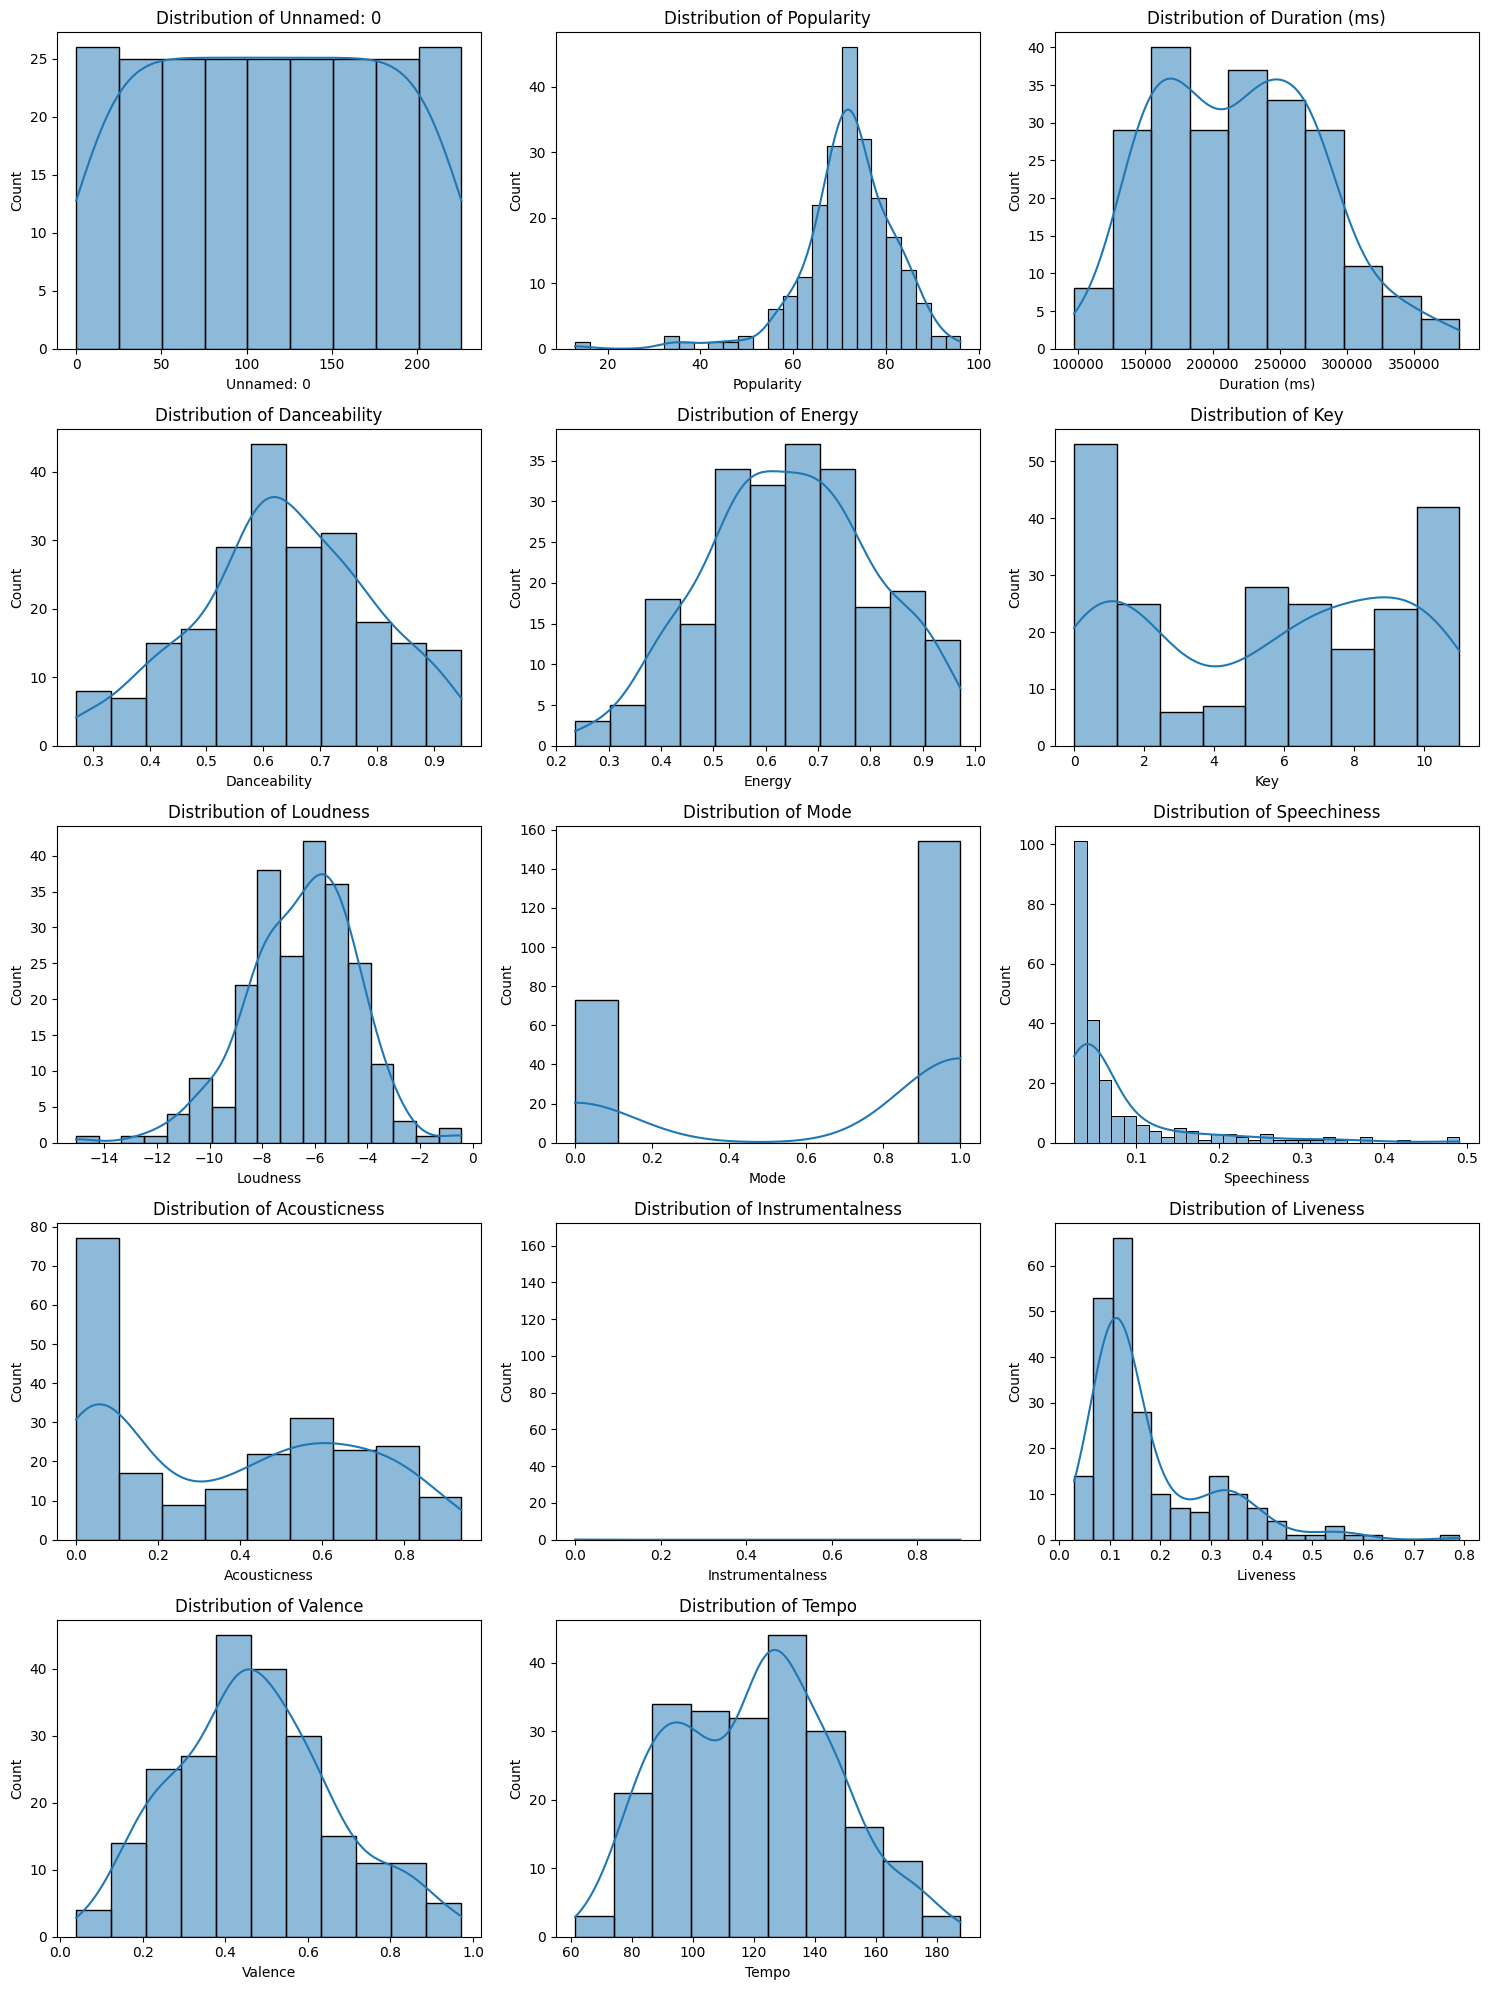

In [39]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(spotify_data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Hide any unused subplots
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [40]:
for feature in numerical_features:
    print(spotify_data[feature].describe())
    print('_-'*10)

count    227.000000
mean     113.000000
std       65.673435
min        0.000000
25%       56.500000
50%      113.000000
75%      169.500000
max      226.000000
Name: Unnamed: 0, dtype: float64
_-_-_-_-_-_-_-_-_-_-
count    227.00000
mean      71.85022
std       10.24110
min       13.00000
25%       68.00000
50%       72.00000
75%       78.00000
max       96.00000
Name: Popularity, dtype: float64
_-_-_-_-_-_-_-_-_-_-
count       227.000000
mean     219254.881057
std       60483.492317
min       96947.000000
25%      170554.500000
50%      222462.000000
75%      265611.000000
max      383639.000000
Name: Duration (ms), dtype: float64
_-_-_-_-_-_-_-_-_-_-
count    227.000000
mean       0.635639
std        0.155123
min        0.271000
25%        0.552000
50%        0.634000
75%        0.746000
max        0.948000
Name: Danceability, dtype: float64
_-_-_-_-_-_-_-_-_-_-
count    227.000000
mean       0.646665
std        0.159150
min        0.236000
25%        0.539500
50%        0.655000
75%

### 📈 Key Descriptive Statistics Summary

* **🎧 Popularity**

  * Avg score: \~72
  * Range: 13 to 96 — wide spread
  * Most songs are moderately popular (50th percentile = 72)

* **⏱ Duration (ms)**

  * Avg duration: \~219,000 ms (\~3.65 mins)
  * Range: \~97k to \~384k ms
  * Represents typical pop song lengths

* **💃 Danceability**

  * Mean: 0.63 (moderate to high)
  * Most songs are rhythmically appealing

* **⚡ Energy**

  * Mean: 0.65
  * High energy is a common trait among songs in this dataset

* **🎼 Key**

  * Range: 0–11 (12 musical keys)
  * Median key: 6 — suggests diversity in tonal characteristics

* **🔊 Loudness**

  * Avg: -6.5 dB
  * Reflects commercial mastering levels
  * Range: -15 to \~0 dB

* **🔘 Mode**

  * Binary (0 = minor, 1 = major)
  * Mean: \~0.68 → majority of songs are in a major key

* **🗣 Speechiness**

  * Avg: 0.08
  * Most songs have low spoken word content
  * Max of 0.49 hints at a few rap/spoken pieces

* **🎸 Acousticness**

  * Mean: 0.38
  * High standard deviation
  * Shows strong mix of acoustic and non-acoustic songs

* **🎻 Instrumentalness**

  * Very low mean (\~0.03)
  * Most songs are vocal-based

* **🎤 Liveness**

  * Mean: 0.18
  * Low overall — not many live performance tracks

* **😊 Valence**

  * Avg: 0.47
  * Balanced between sad/mellow and happy vibes

* **⏱ Tempo**

  * Mean tempo: \~119 BPM
  * Range: 61 to 188 BPM — mix of slow and fast-paced tracks

In [42]:
# Define the list of audio features to test:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness','Tempo', 'Speechiness', 'Liveness']

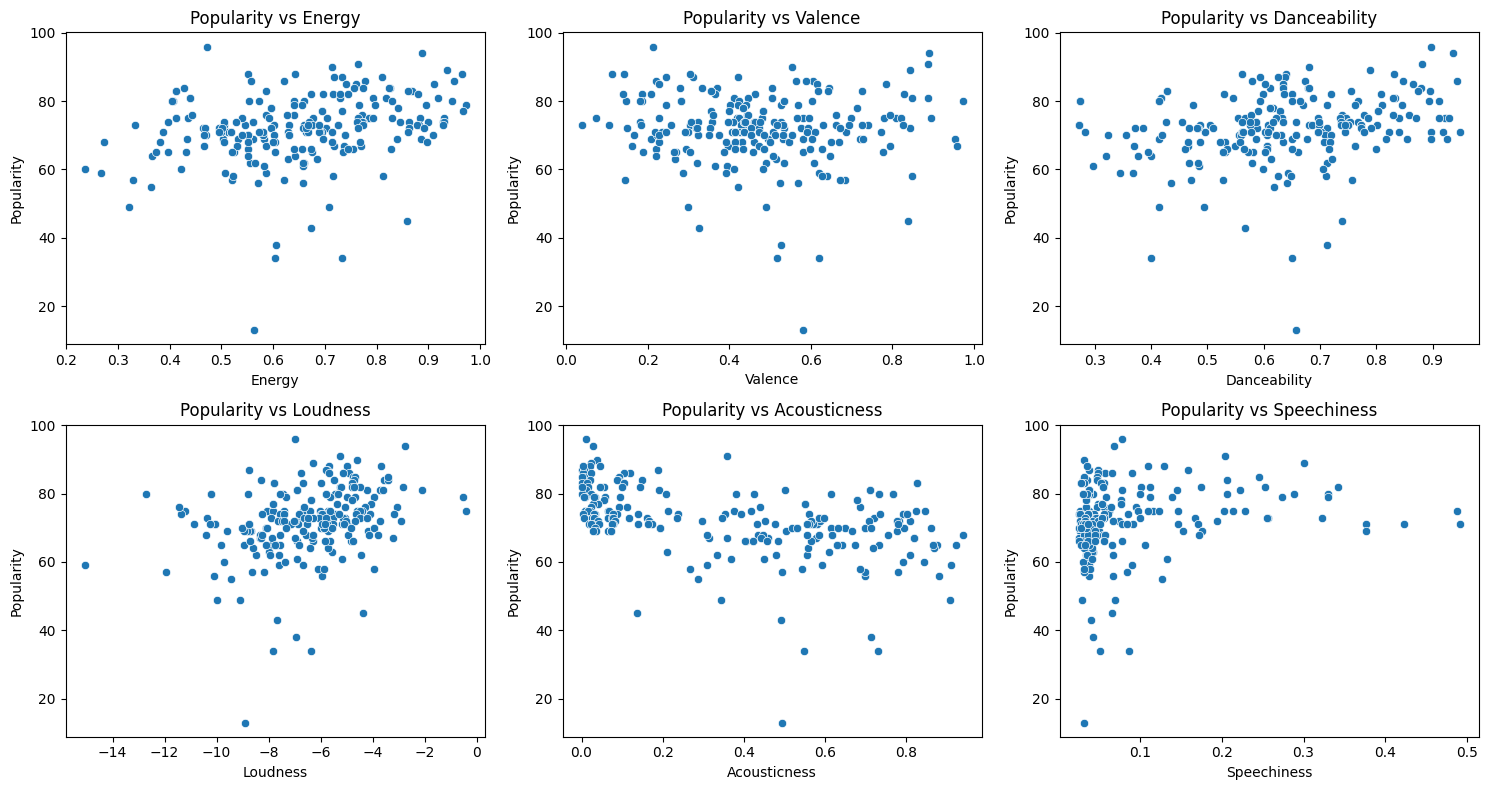

In [43]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=spotify_data, x=feature, y='Popularity', ax=axes[i])
    axes[i].set_title(f'Popularity vs {feature}')

# Hide any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* **Energy vs Popularity**

  * Moderate positive trend.
  * Higher energy often correlates with higher popularity.

* **Valence vs Popularity**

  * Weak correlation.
  * Emotional positivity (valence) doesn’t clearly predict popularity.

* **Danceability vs Popularity**

  * Slight positive trend.
  * More danceable tracks tend to be more popular.

* **Loudness vs Popularity**

  * No strong pattern, but slight clustering.
  * Louder tracks may be mildly more popular.

* **Acousticness vs Popularity**

  * Inverse relationship.
  * Less acoustic songs (more electronic) are generally more popular.

* **Speechiness vs Popularity**

  * Very weak correlation.
  * High speechiness (spoken word content) doesn’t indicate high popularity.

---

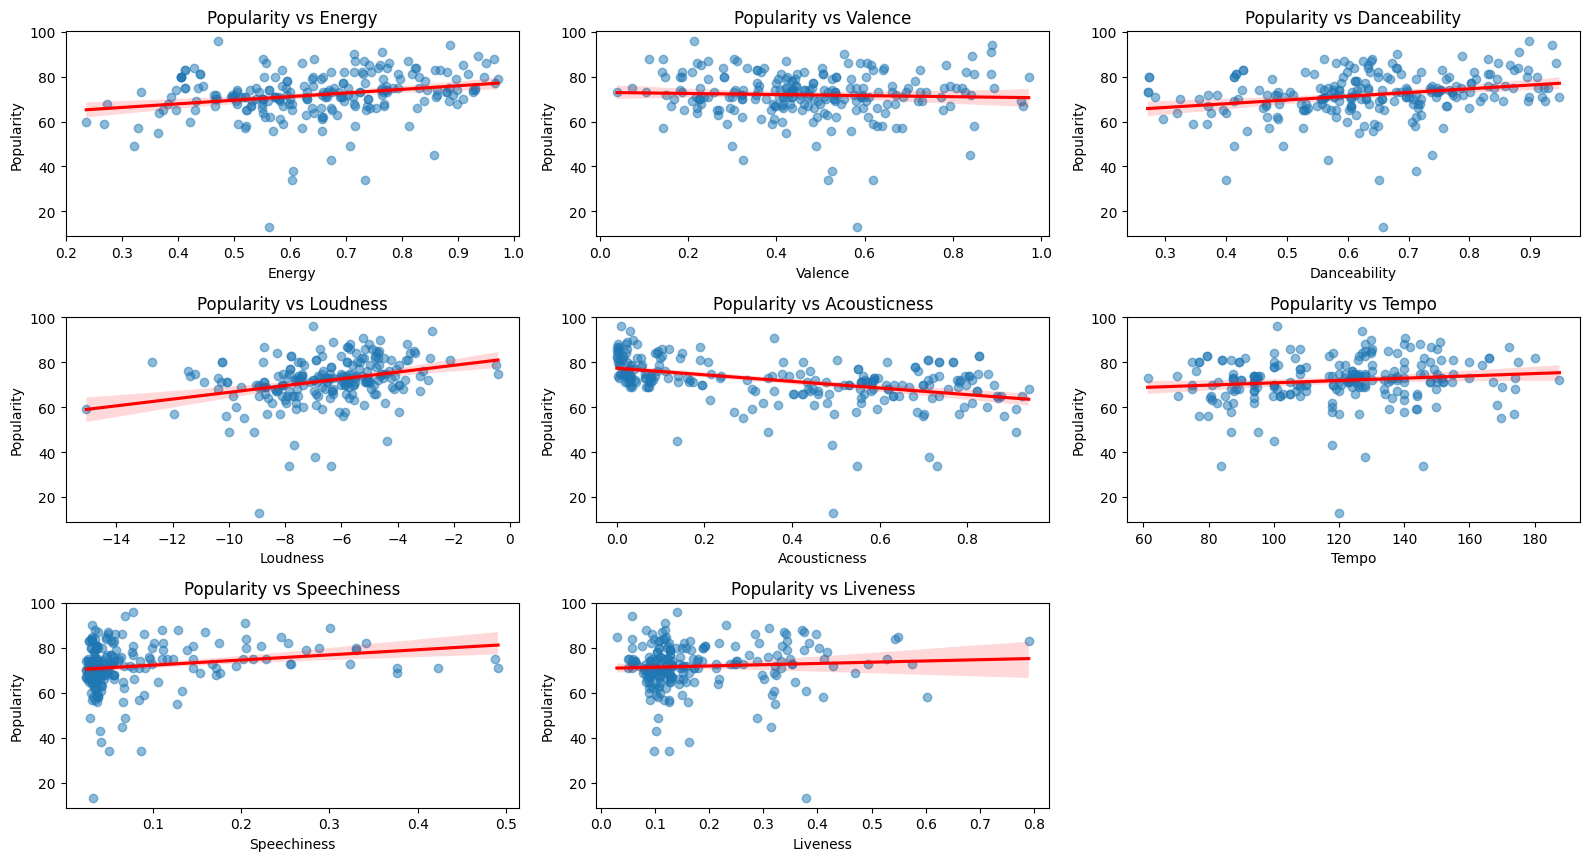

In [69]:
plt.figure(figsize=(16, 14))
# Update the subplot call to use the calculated number of rows and defined columns
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(x=feature, y='Popularity', data=spotify_data, scatter_kws={'alpha': 0.5}, line_kws = {'color':'red'})
    plt.title(f'Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

### 📉 Linear Relationship Insights (Popularity vs Features)

* **Energy**
  🔺 Slight positive trend — high-energy tracks are marginally more popular.

* **Valence**
  ⚪ Flat trend — emotional positivity shows minimal influence on popularity.

* **Danceability**
  🔺 Positive slope — more danceable songs tend to be better received.

* **Loudness**
  🔺 Clear upward trend — louder tracks show a stronger linear relationship with higher popularity.

* **Acousticness**
  🔻 Negative trend — acoustic-heavy tracks are generally less popular.

* **Tempo**
  🔺 Weak upward trend — higher tempo slightly correlates with more popularity, but not strongly.

* **Speechiness**
  🔺 Minor positive correlation — tracks with some spoken word content can still perform well.

* **Liveness**
  🔺 Very weak positive trend — little impact on popularity.

---

### 🧠 Interpretation:

The regression lines confirm earlier findings: **energy, loudness, danceability** positively influence popularity, while **acousticness** negatively correlates. Features like **valence, liveness, tempo**, and **speechiness** offer limited predictive value on their own.

In [ ]:
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = spotify_data[numeric_columns]

In [ ]:
corr_matrix = numeric_data.corr()

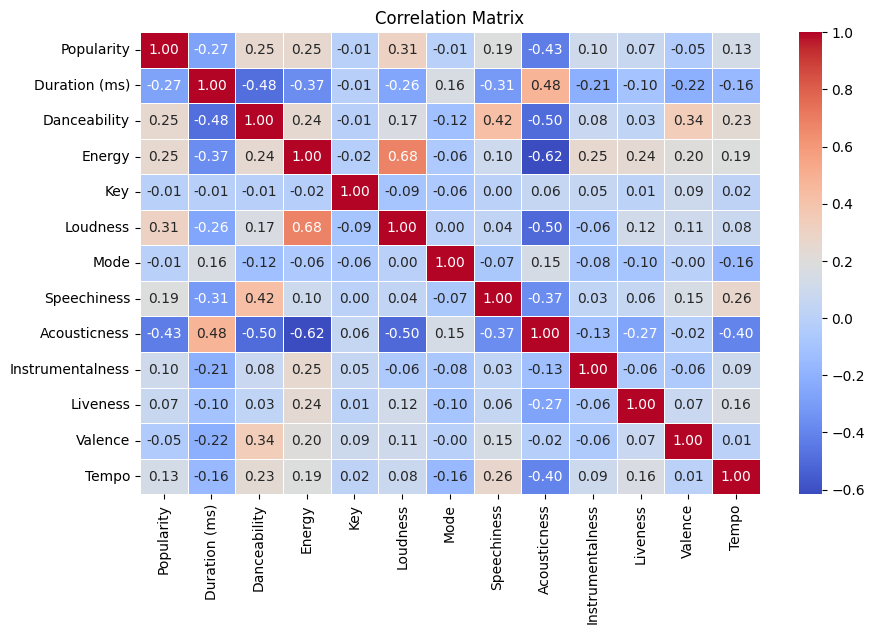

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 📌 Correlation Matrix Insights (Pearson)

* **Popularity Correlations**:

  * **🔊 Loudness (0.31)**: Weak positive correlation — louder tracks tend to be slightly more popular.
  * **💃 Danceability & ⚡ Energy (0.25 each)**: Mild positive association — upbeat and energetic songs may have better engagement.
  * **🗣 Speechiness (0.19)**: Weakly positive — tracks with more vocal content might attract some listeners.
  * **🎸 Acousticness (-0.43)**: Moderate negative correlation — acoustic songs are generally less popular.

* **Feature Interactions**:

  * **Energy & Loudness (0.68)**: Strong positive correlation — energetic tracks are naturally louder.
  * **Danceability & Acousticness (-0.50)**: Inverse relation — danceable tracks tend to be less acoustic.
  * **Energy & Acousticness (-0.62)**: High negative — energetic tracks are typically less acoustic.

* **Negligible or No Correlation**:

  * **Key, Mode, Liveness, Instrumentalness** all show low or near-zero correlation with Popularity — limited predictive value.

Now, let’s have a look at the distribution of all the music features:

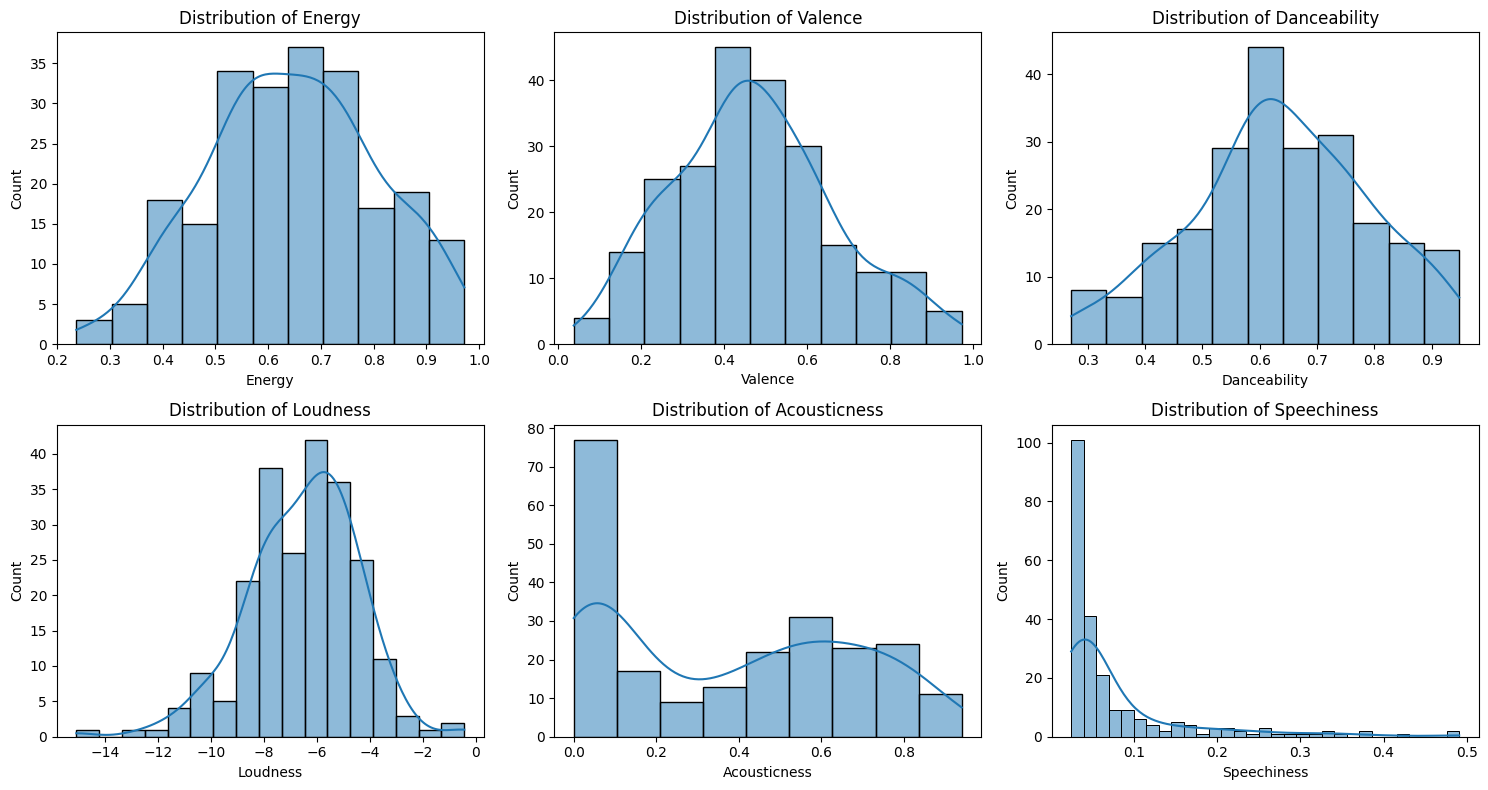

In [45]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(spotify_data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Hide any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* **Energy**

  * Roughly normally distributed.
  * Most songs have moderate to high energy.

* **Valence**

  * Bell-shaped distribution, slightly left-skewed.
  * Indicates a good mix of both emotionally positive and neutral songs.

* **Danceability**

  * Near-normal distribution centered around 0.6.
  * Suggests many tracks are rhythmically appealing and easy to move to.

* **Loudness**

  * Normally distributed with a peak around -6 dB.
  * Reflects typical mastering levels of commercial music.

* **Acousticness**

  * Right-skewed (positively skewed).
  * Most songs are low in acoustic elements, likely favoring electronic production.

* **Speechiness**

  * Heavily right-skewed.
  * Majority of songs have minimal spoken-word content (non-rap/hip-hop dominant dataset).

In [70]:
print('Pearson Corelation Analysis')
print('---------------------------')
for feature in features:
    corr, p_value = pearsonr(spotify_data[feature], spotify_data['Popularity'])
    print(f'{feature}: Correlation = {corr:.2f}, P_Value = {p_value:.4f}')

Pearson Corelation Analysis
---------------------------
Energy: Correlation = 0.25, P_Value = 0.0001
Valence: Correlation = -0.05, P_Value = 0.4944
Danceability: Correlation = 0.25, P_Value = 0.0001
Loudness: Correlation = 0.31, P_Value = 0.0000
Acousticness: Correlation = -0.43, P_Value = 0.0000
Tempo: Correlation = 0.13, P_Value = 0.0473
Speechiness: Correlation = 0.19, P_Value = 0.0039
Liveness: Correlation = 0.07, P_Value = 0.3214


Here’s a polished and technical summary of your **Pearson Correlation Analysis**:

---

### 📊 Pearson Correlation Analysis Summary

This analysis evaluates the linear relationship between audio features and **song popularity**. Below are the correlation coefficients along with their **p-values**, indicating the statistical significance of the relationships:

| Feature          | Correlation | P-Value    | Interpretation                                                                                                            |
| ---------------- | ----------- | ---------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Loudness**     | **0.31**    | **0.0000** | Moderate positive correlation; statistically significant. Louder tracks are more likely to be popular.                    |
| **Acousticness** | **-0.43**   | **0.0000** | Moderate negative correlation; statistically significant. Acoustic songs tend to be less popular.                         |
| **Danceability** | **0.25**    | **0.0001** | Weak positive correlation; significant. Danceable tracks may perform better.                                              |
| **Energy**       | **0.25**    | **0.0001** | Weak positive correlation; significant. Energetic songs have slight popularity advantage.                                 |
| **Speechiness**  | **0.19**    | **0.0039** | Very weak positive correlation; still statistically significant. Spoken-word content might slightly influence popularity. |
| **Tempo**        | **0.13**    | **0.0473** | Very weak positive correlation; borderline significant.                                                                   |
| **Liveness**     | **0.07**    | 0.3214     | No significant correlation. Live performance feel has little to no impact.                                                |
| **Valence**      | **-0.05**   | 0.4944     | No correlation; not statistically significant. Mood (positivity) does not predict popularity.                             |

---

### 🧠 Key Takeaway:

Features like **loudness, acousticness, danceability, and energy** are statistically significant and provide meaningful signals for predicting popularity. **Valence and liveness**, however, show negligible and non-significant correlation, suggesting limited predictive power.

Would you like this added directly to your notebook or used in your final report summary?


Feature Selection and Model Training
Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:

1. Energy
2. Valence
3. Danceability
4. Loudness
5. Acousticness
6. Tempo
7. Speechiness
8. Liveness

These features capture various audio characteristics that influence the popularity of music tracks.

In [46]:
# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']

The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected. So, let’s split and scale the data and then train the model using the random forest regression algorithm:

In [ ]:
X = spotify_data[features]
y = spotify_data['Popularity']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2', 1.0],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

In [51]:
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)

In [52]:
grid_search_rf.fit(X_train_scaled, y_train)

Streaming output truncated to the last 5000 lines.
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total t

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 50, None],
                         'max_features': ['sqrt', 'log2', 1.0],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [53]:
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

In [56]:
print(best_params_rf)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [57]:
print(best_rf_model)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, random_state=42)


In [54]:
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

Note: I selected the random forest algorithm after going through various algorithms. The random forest algorithm resulted in better performance in comparison to the other algorithms after hyperparameter tuning.

Now, let’s have a look at the actual vs predicted results of the test data:

In [ ]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

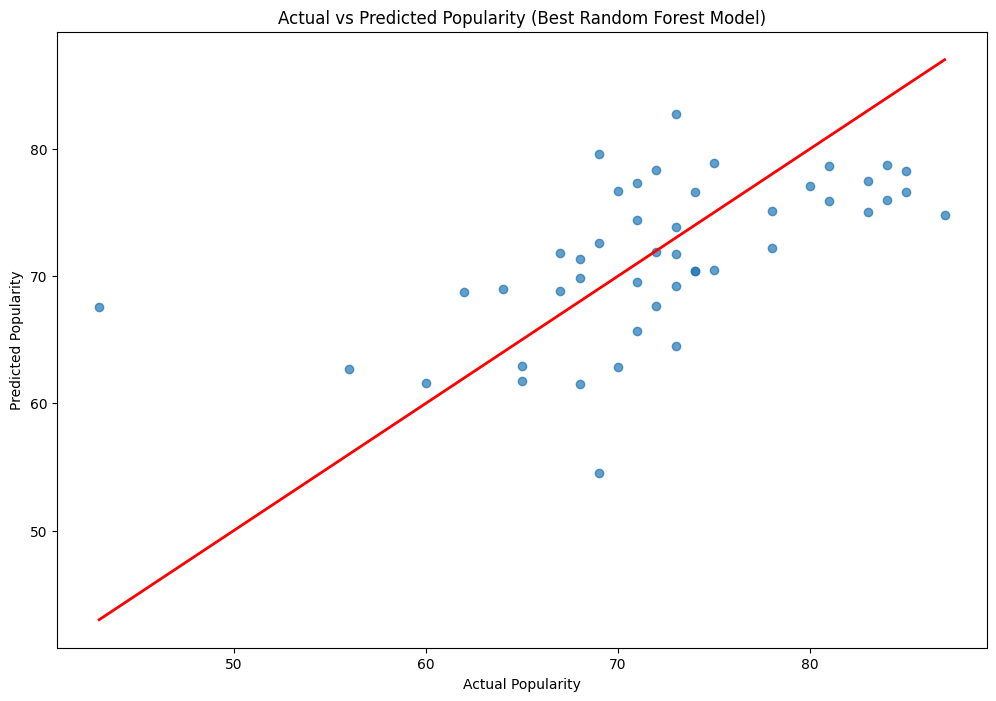

In [58]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

The red line represents perfect predictions, where the predicted popularity would exactly match the actual popularity. Most of the points are clustered around this line, which indicates that the model is making reasonably accurate predictions. However, there are some deviations, particularly at lower popularity values, which suggest areas where the model’s predictions are less precise.

## **Summary**
Thus, we have successfully demonstrated how to build and train a machine learning model for music popularity prediction using Python. Such predictive modeling can empower music streaming platforms to better understand user preferences, optimize playlist curation, and enhance recommendation engines — ultimately driving increased user engagement and satisfaction.